In [2]:
#importing packages
import pandas as pd  
import statsmodels
from statsmodels.tsa.stattools import adfuller
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#paths used 
#using pandas to import the training data
data = pd.read_csv(r'C:\Users\rames\Downloads\time\DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col='date')


As the seasonality component shown in the graph is not clearly visible, the components have been shown separately.


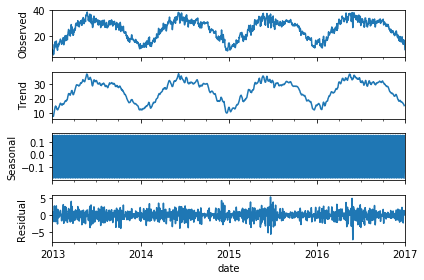

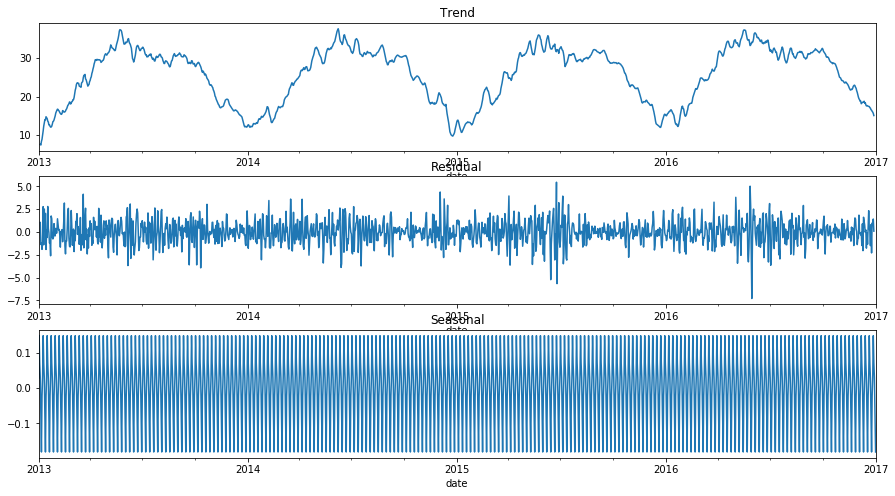

In [3]:
#Question 2a)i)

#Decompose the Monthly resampled data into trend, seasonality and residual. Is it an additive or multiplicative series?

s=sm.tsa.seasonal_decompose(data.meantemp)
resplot = s.plot()

print("As the seasonality component shown in the graph is not clearly visible, the components have been shown separately.")
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
s.trend.plot(ax=ax1,title="Trend")
s.resid.plot(ax=ax2,title="Residual")
s.seasonal.plot(ax=ax3,title="Seasonal")

 ACF and PACF before removing non-stationary components


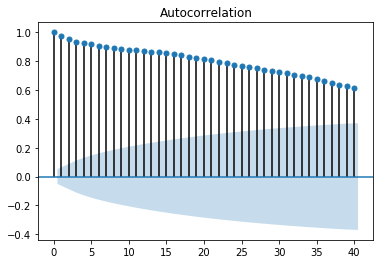

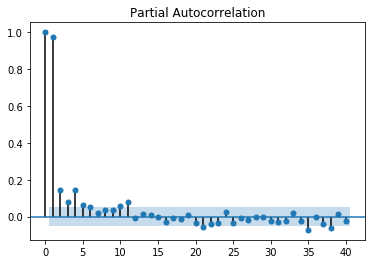

Inferences from ACF and PACF before removing non-stationary components
If the ACF graph moves from 1 to 0 over a prolonged period of time that means that terms in the series are correlated several periods in the past, thus, it implies that the data is non-stationary. Thus, it can be observed here that the meantemp is not stationary


In [4]:
#Question 2a)ii
#Plot the ACF and PACF plots for the meantemp  series. What can you conclude from the plots? 

#plotting ACF and PACF before removing non-stationary components 

print(" ACF and PACF before removing non-stationary components")
sm.graphics.tsa.plot_acf(data.meantemp.squeeze(), lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(data.meantemp.squeeze(), lags=40)
plt.show()

print("Inferences from ACF and PACF before removing non-stationary components")
print("If the ACF graph moves from 1 to 0 over a prolonged period of time that means that terms in the series are correlated several periods in the past, thus, it implies that the data is non-stationary. Thus, it can be observed here that the meantemp is not stationary")

Inferences from ACF and PACF after removing non-stationary components by first order differencing
The p value for the Auto Regressive Model(AR) can be inferred from the PACF graph by the number of spikes(lags) before it cuts off. Thus, the p value from the graph is 1.
The q value for the Moving Average Model(MA) can be inferred from the ACF graph by the number of spikes(lags) before it cuts off. Thus, the q value from the graph is 1.

Model parameters
p:1
q:1
d:1


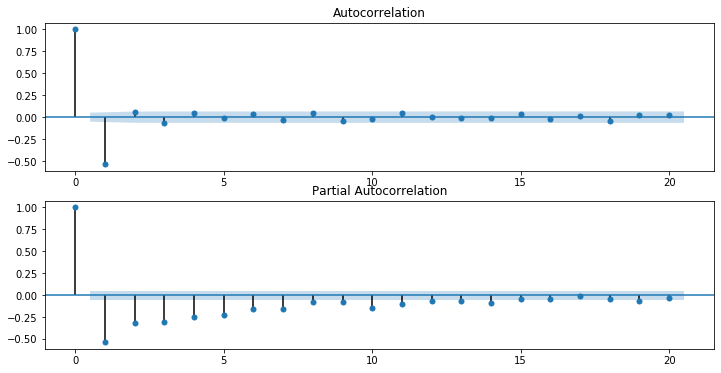

In [6]:
# plotting ACF and PACF after removing non-stationary components
#first order differencing to convert to stationary
data.meantemp= data.meantemp.diff()
data.meantemp = data.meantemp.replace([np.inf, -np.inf], np.nan).dropna()

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(data.meantemp.dropna(), ax=ax[0], lags=20)
ax[1] = plot_pacf(data.meantemp.dropna(), ax=ax[1], lags=20)

print("Inferences from ACF and PACF after removing non-stationary components by first order differencing")
print("The p value for the Auto Regressive Model(AR) can be inferred from the PACF graph by the number of spikes(lags) before it cuts off. Thus, the p value from the graph is 1.")
print("The q value for the Moving Average Model(MA) can be inferred from the ACF graph by the number of spikes(lags) before it cuts off. Thus, the q value from the graph is 1.\n")
print("Model parameters")
print("p:1\nq:1\nd:1")

In [7]:
#reading original values again
data = pd.read_csv(r'C:\Users\rames\Downloads\time\DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col='date')
#Question 2b)

# Is the meantemp  a stationary time series? (3 points) 
#i) Provide one statistical and one non-statistical test to support your claim. 
 
#statistical measure to check if stationary 
#using the ADF(Augmented Dickey Fuller Test)
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data.meantemp)

#conclusion
print("\nThe ADF Test assumes null hypothesis:series has unit root and alternate hypothesis:series is stationary")
print("The ADF test gives a pvalue is greater than 0.05. Thus, this does not rule out the Null Hypothesis.")
print("Thus, the meantemp series is non-stationary.")


Results of Dickey-Fuller Test:
Test Statistic                   -2.021069
p-value                           0.277412
#Lags Used                       10.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64

The ADF Test assumes null hypothesis:series has unit root and alternate hypothesis:series is stationary
The ADF test gives a pvalue is greater than 0.05. Thus, this does not rule out the Null Hypothesis.
Thus, the meantemp series is non-stationary.


1)In Question 2a i), the series could be broken down into trend and seasonal components. Thus, this proves that the series is non stationary
2)Since the lags in the ACF are declining very slowly, that means that terms in the series are correlated several periods in the past. Because this series is not stationary, we must transform it into a stationary time series so that we can build a model with it.


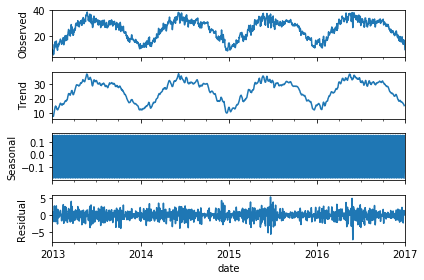

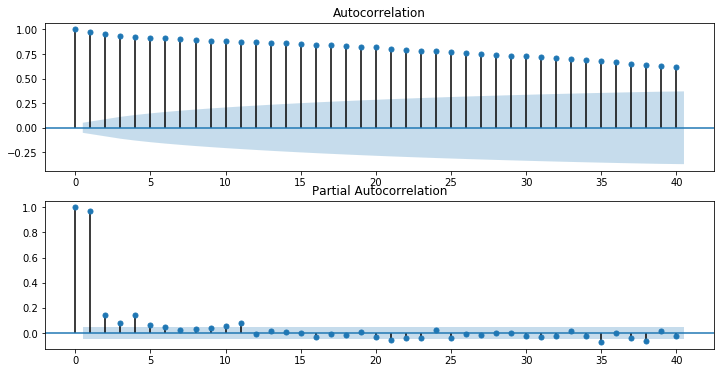

In [8]:
#non-statistical measure to check if stationary 
#using decomposition of series and the ACF graph to test if stationary or not
s=sm.tsa.seasonal_decompose(data.meantemp)
resplot = s.plot()
print("1)In Question 2a i), the series could be broken down into trend and seasonal components. Thus, this proves that the series is non stationary")

#additional test

#using the ACF graph
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(data.meantemp.dropna(), ax=ax[0], lags=40)
ax[1] = plot_pacf(data.meantemp.dropna(), ax=ax[1], lags=40)

print("2)Since the lags in the ACF are declining very slowly, that means that terms in the series are correlated several periods in the past. Because this series is not stationary, we must transform it into a stationary time series so that we can build a model with it.")

The new graph is plotted after first order differencing. It can be observed that it appears stationary.


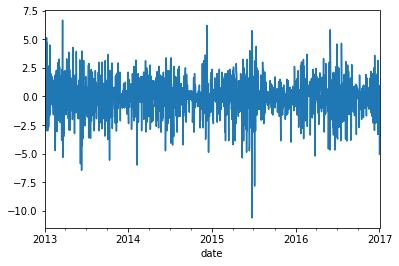

In [9]:
#Question 2b)ii) If it isn’t stationary convert it to stationary using 1st order differentials. Perform Augmented Dickey Fuller test  to verify that it is indeed stationary. 
 
#appling first order differencing to convert to stationary series
data.meantemp= data.meantemp.diff()
#plot the graph to see if series has been converted to a stationary series
data.meantemp.plot()

print("The new graph is plotted after first order differencing. It can be observed that it appears stationary.")

In [10]:
#applying ADF test to verify that series has been converted to a stationary series
#removing any NA value or infinity values
diff=data.meantemp.replace([np.inf, -np.inf], np.nan).dropna()
adf_test(diff)

print("The ADF test gives a pvalue less than 0.05")
print("This confirms the alternate hypothesis that series is stationary.")
print("This concludes that the new first order differenced series has been converted to a stationary series.")

Results of Dickey-Fuller Test:
Test Statistic                -1.637872e+01
p-value                        2.764863e-29
#Lags Used                     9.000000e+00
Number of Observations Used    1.451000e+03
Critical Value (1%)           -3.434865e+00
Critical Value (5%)           -2.863534e+00
Critical Value (10%)          -2.567832e+00
dtype: float64
The ADF test gives a pvalue less than 0.05
This confirms the alternate hypothesis that series is stationary.
This concludes that the new first order differenced series has been converted to a stationary series.
